In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from linearmodels.panel import PanelOLS
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix All Data

In [4]:
df = pd.read_csv("Dataframes/economic_story_clean.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df.shape

(19201, 23)

# Add Macro to economic story clean

In [5]:
df2 = pd.read_csv("Dataframes/macro_from_mo.csv")
df2 = df2.drop(["Instrument", "Date", "GICS Industry Group Name", "Earnings Per Share - Actual Surprise", "Earnings Per Share - Actual Surprise AbsVals"], axis=1)
df2.shape

(19201, 5)

In [6]:
df = pd.concat([df, df2], axis=1)

In [7]:
df = df[df["Earnings Per Share – Coefficient of Variation"] >= 0]
df

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,...,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,0.54,0.48571,11.178,11.178,Materials,3.625620,3.426001e+09,1.532200e+09,...,34.92,0.799347,10.637479,207295.0,-1,22.538500,0.166000,0.359537,76.666667,7.733333
1,AVY.N,2013-04-01,0.59,0.57571,2.482,2.482,Materials,2.046169,4.309428e+09,1.498900e+09,...,43.07,0.895787,24.148726,0.0,-1,23.468125,0.143750,0.360572,81.666667,7.533333
2,AVY.N,2013-07-01,0.71,0.70250,1.068,1.068,Materials,1.551601,4.258229e+09,1.552300e+09,...,42.76,0.906078,-0.054218,0.0,-1,24.099219,0.125625,0.463789,81.566667,7.233333
3,AVY.N,2013-10-01,0.69,0.63833,8.095,8.095,Materials,2.775994,4.273414e+09,1.504900e+09,...,43.52,0.903176,2.467620,236291.0,-1,19.740938,0.125806,0.441854,76.933333,6.933333
4,AVY.N,2014-01-01,0.69,0.68000,1.471,1.471,Materials,3.204412,4.877168e+09,1.583900e+09,...,50.19,0.920659,16.003852,157761.0,-1,19.563770,0.126230,0.465460,80.933333,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,4.51,3.84833,17.194,17.194,Retailing,2.836295,1.742020e+10,1.411448e+09,...,434.41,3.684400,-5.130322,157740.0,-1,43.036308,0.140755,0.382645,69.900000,4.200000
19197,POOL.OQ,2022-01-01,2.63,1.87500,40.267,40.267,Retailing,3.269867,2.268979e+10,1.035557e+09,...,566.00,4.504382,30.489705,82349.0,-1,52.695806,0.467234,0.380946,63.133333,3.800000
19198,POOL.OQ,2022-04-01,4.23,3.14867,34.342,34.342,Retailing,6.630736,1.696712e+10,1.412650e+09,...,422.85,3.422880,-25.160664,290897.0,-1,50.457581,1.394118,0.495588,57.866667,3.600000
19199,POOL.OQ,2022-07-01,7.63,7.51700,1.503,1.503,Retailing,3.625249,1.405795e+10,2.055818e+09,...,351.23,2.749481,-21.661570,185584.0,-1,49.861562,2.885882,0.423045,56.100000,3.566667


# Check Correlation on big dataframe (Wrong)

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

/var/folders/48/zl9xdnts1pgch2fdmc_lcyl40000gn/T/ipykernel_45883/1602989714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

In [716]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_matrix = df[df['Instrument'] == 'AAPL.OQ'].drop("loss firm status", axis=1)
#.iloc[0:38, :]

# print the reversed DataFrame
for_matrix

,Instrument,Date,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,...,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
10116,AAPL.OQ,2013-01-01,0.49321,0.48109,2.520,2.520,Technology Hardware & Equipment,5.811802,4.793665e+11,5.451200e+10,...,4.54189,19.036767,3.006664,-19.737215,121906437.0,22.538500,0.166000,0.359537,76.666667,7.733333
10117,AAPL.OQ,2013-04-01,0.36036,0.35721,0.881,0.881,Technology Hardware & Equipment,4.599535,4.156834e+11,4.360300e+10,...,3.65908,15.808198,2.282290,-16.489690,0.0,23.468125,0.143750,0.360572,81.666667,7.533333
10118,AAPL.OQ,2013-07-01,0.26679,0.26143,2.049,2.049,Technology Hardware & Equipment,4.054623,3.722025e+11,3.532300e+10,...,3.39846,14.145700,1.969590,-9.919175,0.0,24.099219,0.125625,0.463789,81.566667,7.233333
10119,AAPL.OQ,2013-10-01,0.29500,0.28414,3.822,3.822,Technology Hardware & Equipment,2.301682,4.385769e+11,3.747200e+10,...,2.66156,17.026769,2.405362,21.163436,72711424.0,19.740938,0.125806,0.441854,76.933333,6.933333
10120,AAPL.OQ,2014-01-01,0.51786,0.50238,3.081,3.081,Technology Hardware & Equipment,2.257255,5.039343e+11,5.759400e+10,...,2.85787,20.039623,2.791847,18.383994,63846167.0,19.563770,0.126230,0.465460,80.933333,6.666667
10121,AAPL.OQ,2014-04-01,0.41500,0.36407,13.989,13.989,Technology Hardware & Equipment,1.996869,4.788732e+11,4.564600e+10,...,2.73699,19.169267,2.521857,-3.773913,47069979.0,17.441587,0.112063,0.451679,82.833333,6.200000
10122,AAPL.OQ,2014-07-01,0.32000,0.30776,3.978,3.978,Technology Hardware & Equipment,3.499480,5.508839e+11,3.743200e+10,...,3.71550,23.232500,3.023181,21.847348,43372516.0,18.124219,0.125000,0.430669,82.966667,6.066667
10123,AAPL.OQ,2014-10-01,0.35500,0.32628,8.802,8.802,Technology Hardware & Equipment,3.763639,6.032776e+11,4.212300e+10,...,2.79397,25.187500,3.279654,8.954257,55882288.0,36.832188,0.136129,0.428354,89.766667,5.700000
10124,AAPL.OQ,2015-01-01,0.76500,0.65047,17.607,17.607,Technology Hardware & Equipment,4.466002,6.685331e+11,7.459900e+10,...,3.57850,27.595000,3.597358,10.032024,46282028.0,54.676557,0.152167,0.333412,95.500000,5.533333
10125,AAPL.OQ,2015-04-01,0.58250,0.53968,7.935,7.935,Technology Hardware & Equipment,4.304403,7.179002e+11,5.801000e+10,...,4.04363,31.107500,3.647214,13.170497,49290460.0,36.469524,0.154286,0.378250,94.233333,5.433333


In [717]:
corr_matrix = for_matrix.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_12772\3153494378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_matrix.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

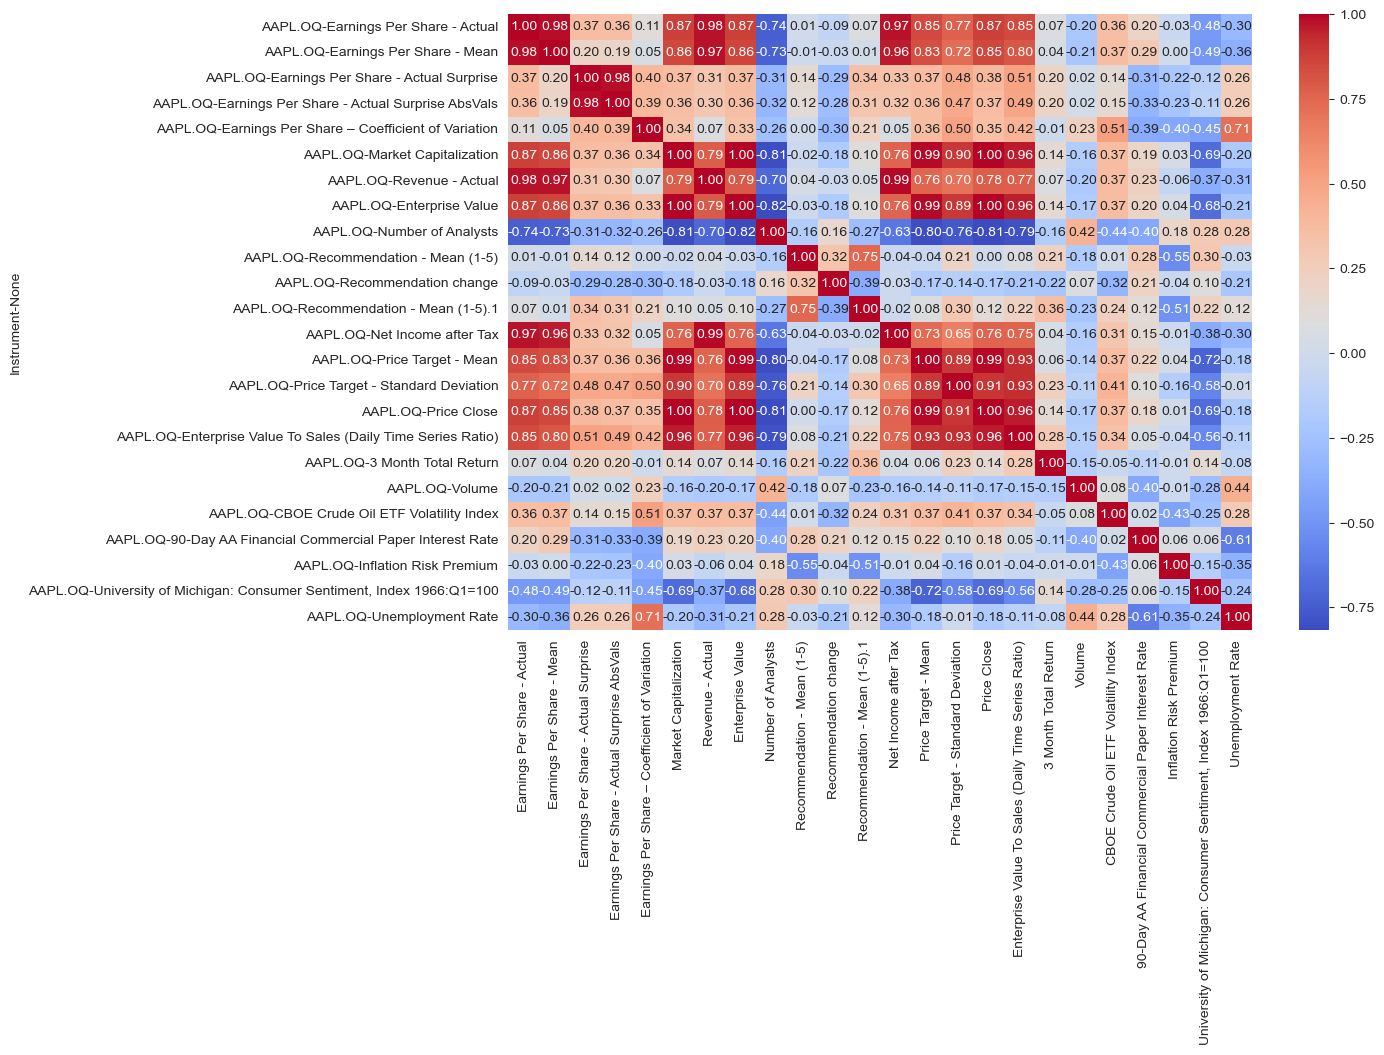

In [718]:
# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

Some variables are highly correlated, so we will dorp them:

*

In [719]:
df = df.drop(["Enterprise Value", "Price Close", "Price Target - Mean", "Net Income after Tax", "Earnings Per Share - Actual", "Earnings Per Share - Mean", "Recommendation - Mean (1-5)", "Recommendation change", "Earnings Per Share - Actual Surprise", "Volume", "Enterprise Value To Sales (Daily Time Series Ratio)"], axis=1)
for_matrix = df[df['Instrument'] == 'AAPL.OQ'].drop("loss firm status", axis=1)
#for_rf
#, "Volume", "Enterprise Value To Sales (Daily Time Series Ratio)", "Recommendation - Mean (1-5)", "Recommendation change", "Earnings Per Share - Actual Surprise", "Earnings Per Share – Coefficient of Variation"

In [720]:
corr_matrix = for_matrix.groupby('Instrument').corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_12772\3153494378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_matrix.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

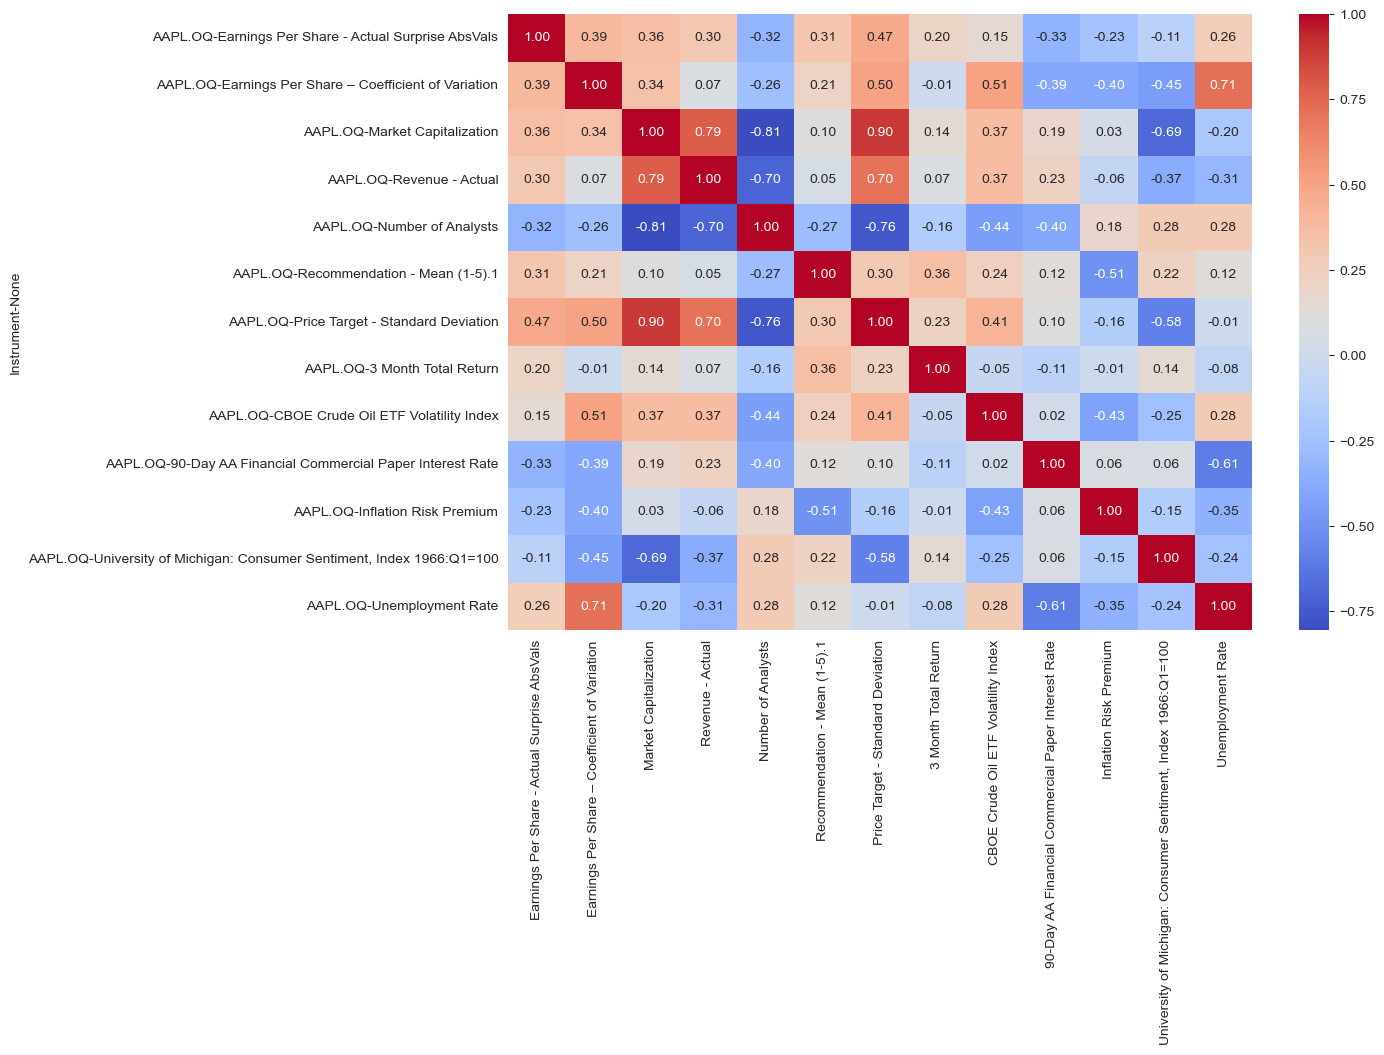

In [721]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [722]:
from sklearn.preprocessing import StandardScaler

In [723]:
rescale =  df.copy()
rescale["Revenue - Actual"] = StandardScaler().fit_transform(np.array(rescale["Revenue - Actual"]).reshape(-1,1))
rescale["Market Capitalization"] = StandardScaler().fit_transform(np.array(rescale["Market Capitalization"]).reshape(-1,1))
rescale["3 Month Total Return"] = StandardScaler().fit_transform(np.array(rescale["3 Month Total Return"]).reshape(-1,1))
rescale["Earnings Per Share – Coefficient of Variation"] = StandardScaler().fit_transform(np.array(rescale["Earnings Per Share – Coefficient of Variation"]).reshape(-1,1))
rescale["Number of Analysts"] = StandardScaler().fit_transform(np.array(rescale["Number of Analysts"]).reshape(-1,1))
rescale["Price Target - Standard Deviation"] = StandardScaler().fit_transform(np.array(rescale["Price Target - Standard Deviation"]).reshape(-1,1))
rescale["CBOE Crude Oil ETF Volatility Index"] = StandardScaler().fit_transform(np.array(rescale["CBOE Crude Oil ETF Volatility Index"]).reshape(-1,1))
rescale["90-Day AA Financial Commercial Paper Interest Rate"] = StandardScaler().fit_transform(np.array(rescale["90-Day AA Financial Commercial Paper Interest Rate"]).reshape(-1,1))
rescale["Inflation Risk Premium"] = StandardScaler().fit_transform(np.array(rescale["Inflation Risk Premium"]).reshape(-1,1))
rescale["University of Michigan: Consumer Sentiment, Index 1966:Q1=100"] = StandardScaler().fit_transform(np.array(rescale["University of Michigan: Consumer Sentiment, Index 1966:Q1=100"]).reshape(-1,1))
rescale["Unemployment Rate"] = StandardScaler().fit_transform(np.array(rescale["Unemployment Rate"]).reshape(-1,1))

In [724]:
rescale["Earnings Per Share - Actual Surprise AbsVals"] = np.log(rescale["Earnings Per Share - Actual Surprise AbsVals"] + 1)
rescale

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,3 Month Total Return,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,2.499631,Materials,-0.170865,-0.392700,-0.378055,-1.454924,3.000,-0.372481,0.469207,-1,-1.004420,-0.795818,-0.380688,-0.747049,1.389797
1,AVY.N,2013-04-01,1.247607,Materials,-0.235084,-0.385490,-0.380857,-1.454924,3.000,-0.314283,1.410685,-1,-0.944876,-0.817719,-0.367655,-0.338211,1.278991
2,AVY.N,2013-07-01,0.726582,Materials,-0.255193,-0.385908,-0.376364,-1.317440,2.875,-0.299006,-0.275801,-1,-0.904454,-0.835560,0.931854,-0.346387,1.112782
3,AVY.N,2013-10-01,2.207725,Materials,-0.205410,-0.385784,-0.380352,-1.454924,2.875,-0.332867,-0.100077,-1,-1.183607,-0.835381,0.655696,-0.725244,0.946572
4,AVY.N,2014-01-01,0.904623,Materials,-0.187991,-0.380857,-0.373706,-1.317440,2.625,-0.333923,0.843142,-1,-1.194955,-0.834965,0.952897,-0.398173,0.798831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,2.901092,Retailing,-0.202958,-0.278490,-0.388214,-1.317440,2.300,1.525227,-0.629509,-1,0.308492,-0.820667,-0.089760,-1.300343,-0.567779
19197,POOL.OQ,2022-01-01,3.720063,Retailing,-0.185330,-0.235483,-0.419838,-1.317440,2.300,1.163772,1.852531,-1,0.927196,-0.499303,-0.111148,-1.853637,-0.789391
19198,POOL.OQ,2022-04-01,3.565072,Retailing,-0.048679,-0.282188,-0.388113,-1.179957,2.300,1.011830,-2.025245,-1,0.783834,0.413058,1.332205,-2.284280,-0.900197
19199,POOL.OQ,2022-07-01,0.917490,Retailing,-0.170880,-0.305930,-0.334002,-1.179957,2.000,1.805131,-1.781424,-1,0.745658,1.881451,0.418886,-2.428736,-0.918665


# Correlation Matrix AAP

C:\Users\alexa\AppData\Local\Temp\ipykernel_12772\2008632427.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_matrix = for_matrix.groupby('Instrument').corr()


<AxesSubplot: ylabel='Instrument-None'>

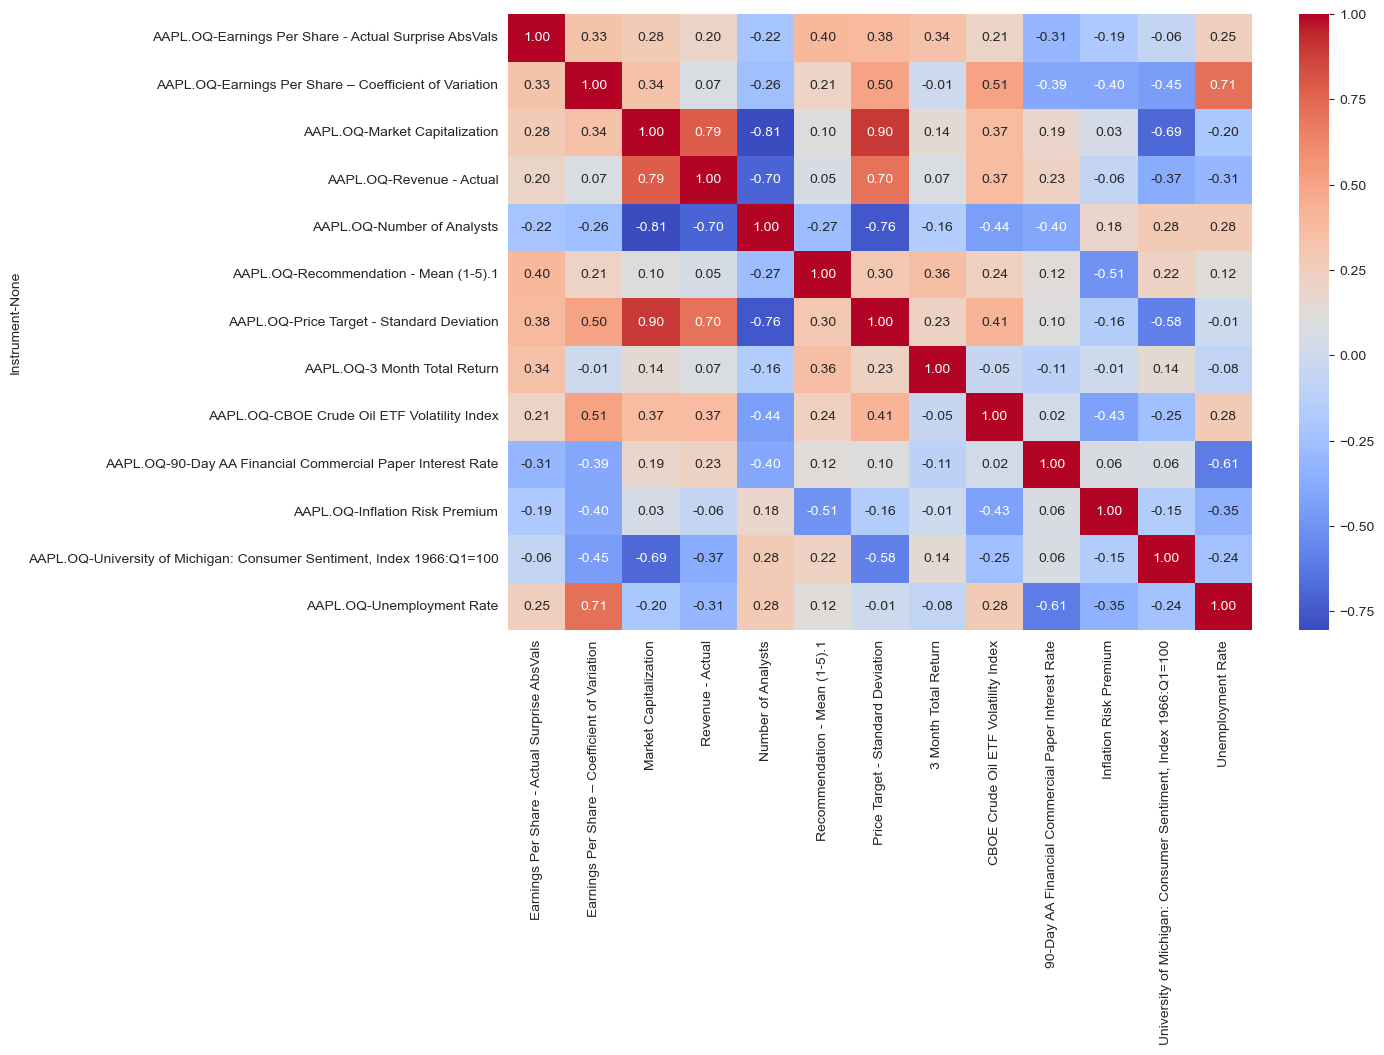

In [725]:
for_matrix = rescale[rescale['Instrument'] == 'AAPL.OQ'].drop("loss firm status", axis=1)
corr_matrix = for_matrix.groupby('Instrument').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [726]:
#rescale = rescale[rescale["GICS Industry Group Name"] != "Real Estate"]
#rescale = rescale.drop("GICS Industry Group Name", axis=1)


In [727]:
rescale

,Instrument,Date,Earnings Per Share - Actual Surprise AbsVals,GICS Industry Group Name,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Number of Analysts,Recommendation - Mean (1-5).1,Price Target - Standard Deviation,3 Month Total Return,loss firm status,CBOE Crude Oil ETF Volatility Index,90-Day AA Financial Commercial Paper Interest Rate,Inflation Risk Premium,"University of Michigan: Consumer Sentiment, Index 1966:Q1=100",Unemployment Rate
0,AVY.N,2013-01-01,2.499631,Materials,-0.170865,-0.392700,-0.378055,-1.454924,3.000,-0.372481,0.469207,-1,-1.004420,-0.795818,-0.380688,-0.747049,1.389797
1,AVY.N,2013-04-01,1.247607,Materials,-0.235084,-0.385490,-0.380857,-1.454924,3.000,-0.314283,1.410685,-1,-0.944876,-0.817719,-0.367655,-0.338211,1.278991
2,AVY.N,2013-07-01,0.726582,Materials,-0.255193,-0.385908,-0.376364,-1.317440,2.875,-0.299006,-0.275801,-1,-0.904454,-0.835560,0.931854,-0.346387,1.112782
3,AVY.N,2013-10-01,2.207725,Materials,-0.205410,-0.385784,-0.380352,-1.454924,2.875,-0.332867,-0.100077,-1,-1.183607,-0.835381,0.655696,-0.725244,0.946572
4,AVY.N,2014-01-01,0.904623,Materials,-0.187991,-0.380857,-0.373706,-1.317440,2.625,-0.333923,0.843142,-1,-1.194955,-0.834965,0.952897,-0.398173,0.798831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,POOL.OQ,2021-10-01,2.901092,Retailing,-0.202958,-0.278490,-0.388214,-1.317440,2.300,1.525227,-0.629509,-1,0.308492,-0.820667,-0.089760,-1.300343,-0.567779
19197,POOL.OQ,2022-01-01,3.720063,Retailing,-0.185330,-0.235483,-0.419838,-1.317440,2.300,1.163772,1.852531,-1,0.927196,-0.499303,-0.111148,-1.853637,-0.789391
19198,POOL.OQ,2022-04-01,3.565072,Retailing,-0.048679,-0.282188,-0.388113,-1.179957,2.300,1.011830,-2.025245,-1,0.783834,0.413058,1.332205,-2.284280,-0.900197
19199,POOL.OQ,2022-07-01,0.917490,Retailing,-0.170880,-0.305930,-0.334002,-1.179957,2.000,1.805131,-1.781424,-1,0.745658,1.881451,0.418886,-2.428736,-0.918665


# Correlation Matrix GE.N

In [1]:
for_matrix = rescale[rescale['Instrument'] == 'GE.N'].drop("loss firm status", axis=1)
corr_matrix = for_matrix.groupby('Instrument').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

NameError: name 'rescale' is not defined

In [728]:
rescale.to_csv("Dataframes/economic_story_regression.csv", index=False)